In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [0]:
#os.chdir("F:/Courses/hack/Genpact hact")

## Problem Statement
Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.
The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:
 
1. Historical data of demand for a product-center combination (Weeks: 1 to 145).
2. Product(Meal) features such as category, sub-category, current price and discount.
3. Information for fulfillment center like center area, city information etc.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive"

# New Section

In [0]:
# demand_data = files.upload("train.csv") content/drive/My Drive/train.csv content/drive/My Drive/train.csv
import pandas as pd

In [0]:
# load Weekly Demand data 
demand_data = pd.read_csv("/content/drive/My Drive/train.csv")  # Contains the historical demand data for all centers

# Contains information for each fulfilment center
fulfilment_center_info = pd.read_csv("/content/drive/My Drive/fulfilment_center_info.csv")

# Contains information for each meal being served
meal_info = pd.read_csv("/content/drive/My Drive/meal_info.csv")

test = pd.read_csv("/content/drive/My Drive/test_QoiMO9B.csv")

In [0]:
demand_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [0]:
demand_data.shape  # num_orders is the target variable
print(f"{demand_data.shape[0]} rows and {demand_data.shape[1]} columns")

(456548, 9)

456548 rows and 9 columns


In [0]:
demand_data.info() # there is no null value
#demand_data.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


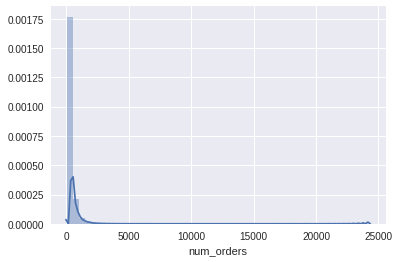

In [0]:
#demand_data.num_orders.plot(kind="bar")
sns.distplot(demand_data['num_orders'])

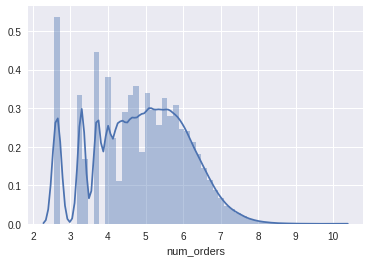

In [0]:
demand_data['num_orders'] = np.log(demand_data['num_orders'])
sns.distplot(demand_data['num_orders'])

In [0]:
merge1= pd.merge(demand_data,meal_info)
Fin_merge= pd.merge(merge1,fulfilment_center_info)

Fin_merge.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,5.176150,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,5.777652,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,4.564348,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,5.093750,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,5.370638,Beverages,Thai,647,56,TYPE_C,2.0


In [0]:
Fin_merge.info() # lets check the structure of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
dtypes: float64(4), int64(8), object(3)
memory usage: 55.7+ MB


In [0]:
Fin_merge.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,4.873096,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,1.219120,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,2.564949,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,3.988984,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,4.912655,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,5.780744,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,10.098190,713.000000,93.000000,7.000000


In [0]:
#delete_columns = ["id","center_id","meal_id"]
train = Fin_merge.drop(["id","center_id","meal_id"],axis=1)
train.head()
train.columns

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1,136.83,152.29,0,0,5.176150,Beverages,Thai,647,56,TYPE_C,2.0
1,2,135.83,152.29,0,0,5.777652,Beverages,Thai,647,56,TYPE_C,2.0
2,3,132.92,133.92,0,0,4.564348,Beverages,Thai,647,56,TYPE_C,2.0
3,4,135.86,134.86,0,0,5.093750,Beverages,Thai,647,56,TYPE_C,2.0
4,5,146.50,147.50,0,0,5.370638,Beverages,Thai,647,56,TYPE_C,2.0


Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code',
       'region_code', 'center_type', 'op_area'],
      dtype='object')

In [0]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
#numeric_data = train.drop("num_orders",axis=1)
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 9 numeric and 3 categorical columns in train data


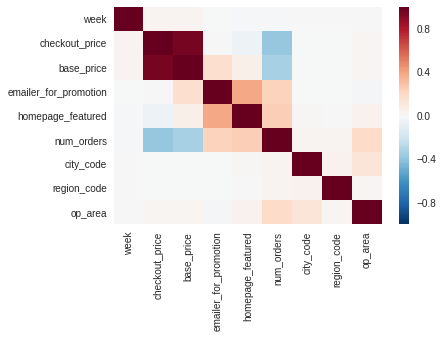

In [0]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [0]:
corr.num_orders.sort_values(ascending=False)

num_orders               1.000000
homepage_featured        0.248002
emailer_for_promotion    0.227207
op_area                  0.195052
city_code                0.030150
region_code              0.029696
week                    -0.008281
base_price              -0.329368
checkout_price          -0.389116
Name: num_orders, dtype: float64

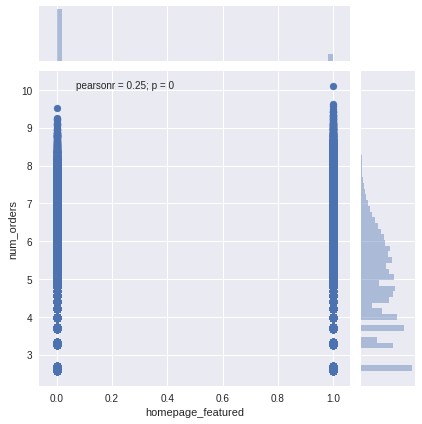

In [0]:

sns.jointplot(x=train['homepage_featured'], y=train['num_orders']);

This shows meals feaured in homepage bring more orders. Notice we have outliers present . 0 meaning not featured and 1 meaning featured in homepage respectively.

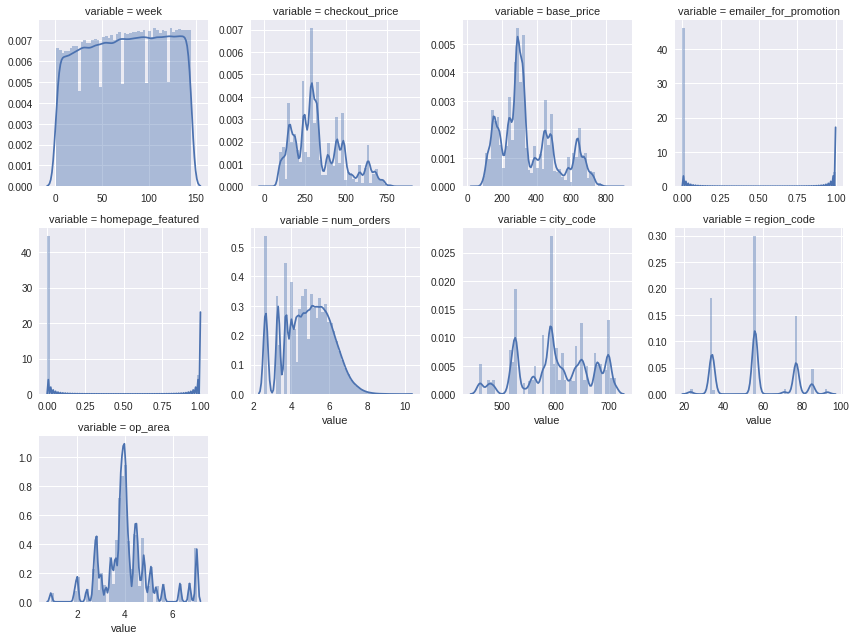

In [0]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
# num.remove(["id","center_id","meal_id"])
# num.remove("id")
# num.remove("center_id")
# num.remove("meal_id")

nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

Some of the variables are skwed, we will come back again for normalizing

In [0]:
# lets take a look in categorical features
cat_data.describe()

,category,cuisine,center_type
count,456548,456548,456548
unique,14,4,3
top,Beverages,Italian,TYPE_A
freq,127890,122925,262881


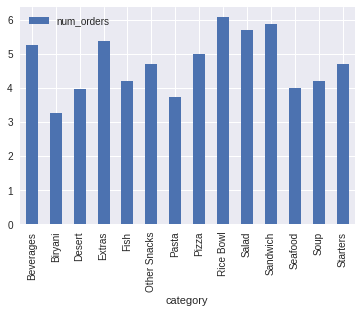

In [0]:
category_pivot = train.pivot_table(index='category', values='num_orders', aggfunc=np.median)
category_pivot.plot(kind="bar")  # there is chance for feature engineering, grouping category group , high low medium demand.

there is chance for feature engineering, grouping category group , high low medium demand. lets come back later

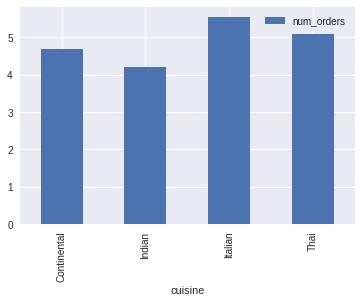

In [0]:
cuisine_pivot = train.pivot_table(index='cuisine', values='num_orders', aggfunc=np.median)
cuisine_pivot.plot(kind="bar")  ;

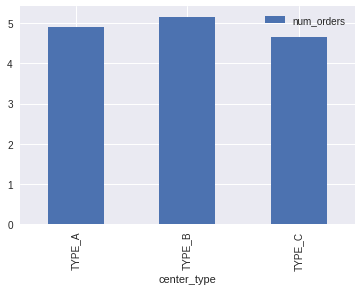

In [0]:
center_type_pivot = train.pivot_table(index='center_type', values='num_orders', aggfunc=np.median)
center_type_pivot.plot(kind="bar") ;

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


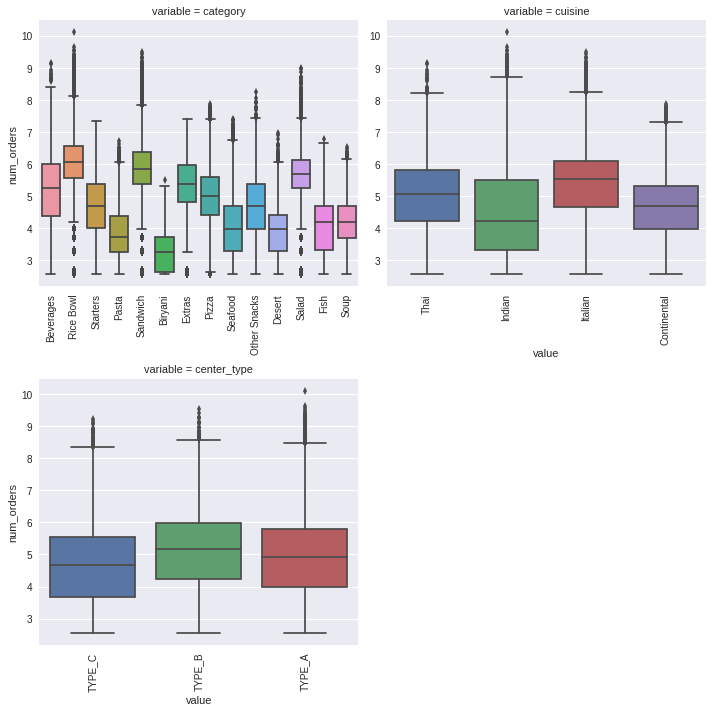

In [0]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='num_orders', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','num_orders')
g;

WOW! so many outliers

In [0]:
# Lets remove some outlier... based on homepage_featured ordering more than 


#sns.jointplot(x=train['homepage_featured'], y=train['num_orders']);

train.drop(train[train['homepage_featured'] > 12000].index, inplace=True)
train.shape

# looks like no data has been removed, crosscheck later

(456548, 12)

In [0]:
num_features = ["checkout_price","base_price","city_code","region_code","op_area"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[num_features])
scaled = scaler.transform(train[num_features])

for i, col in enumerate(num_features):
       train[col] = scaled[:,i]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [0]:
train.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1,-1.277687,-1.256048,0,0,5.176150,Beverages,Thai,0.686548,-0.034837,TYPE_C,-1.9086
1,2,-1.284226,-1.256048,0,0,5.777652,Beverages,Thai,0.686548,-0.034837,TYPE_C,-1.9086
2,3,-1.303253,-1.370349,0,0,4.564348,Beverages,Thai,0.686548,-0.034837,TYPE_C,-1.9086
3,4,-1.284030,-1.364500,0,0,5.093750,Beverages,Thai,0.686548,-0.034837,TYPE_C,-1.9086
4,5,-1.214460,-1.285852,0,0,5.370638,Beverages,Thai,0.686548,-0.034837,TYPE_C,-1.9086


In [0]:
#importing function
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
le = LabelEncoder()
hot = OneHotEncoder()
lb = LabelBinarizer()
# def factorize(data, var, fill_na = None):
#       if fill_na is not None:
#             data[var].fillna(fill_na, inplace=True)
#       le.fit(data[var])
#       data[var] = le.transform(data[var])
#       return data


In [0]:
cat_var = np.array(["category","cuisine","center_type"])

#category = lb.fit_transform(train.category)
for col in cat_var:
  train[col] = lb.fit_transform(train[col])
# cuisine = lb.fit_transform(train.cuisine)
# center_type = lb.fit_transform(train.center_type)
# cuisine

In [0]:
train.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1,-1.277687,-1.256048,0,0,5.176150,1,0,0.686548,-0.034837,0,-1.9086
1,2,-1.284226,-1.256048,0,0,5.777652,1,0,0.686548,-0.034837,0,-1.9086
2,3,-1.303253,-1.370349,0,0,4.564348,1,0,0.686548,-0.034837,0,-1.9086
3,4,-1.284030,-1.364500,0,0,5.093750,1,0,0.686548,-0.034837,0,-1.9086
4,5,-1.214460,-1.285852,0,0,5.370638,1,0,0.686548,-0.034837,0,-1.9086


In [0]:
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, max_depth=3, loss='ls')


In [0]:
# import xgboost as xgb
# regr = xgb.XGBRegressor(colsample_bytree=0.2,
#                        gamma=0.0,
#                        learning_rate=0.05,
#                        max_depth=6,
#                        min_child_weight=1.5,
#                        n_estimators=7200,
#                        reg_alpha=0.9,
#                        reg_lambda=0.6,
#                        subsample=0.2,
#                        seed=42,
#                        silent=1)

# regr.fit(x_train, y_train)

In [0]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [0]:

labels = train["num_orders"]
train = train.drop("num_orders",axis=1)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train,x_test,y_train,y_test = train_test_split(train, labels,random_state= 1 )

# fit estimator
est.fit(x_train, y_train)

# predict 
pred = est.predict(x_test)

# score on test data (accuracy)
acc = mean_squared_error(y_test, pred)
acc

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

0.7554904956276588

In [0]:
from sklearn.model_selection  import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5]  ## depends on the nr of training examples
              # 'max_features': [1.0, 0.3, 0.1] ## not possible in our example (only 1 fx)
              }

est = GradientBoostingRegressor(n_estimators=1)
# this may take some minutes
gs_cv = GridSearchCV(est, param_grid, scoring="neg_mean_squared_log_error", n_jobs=4).fit(x_train, y_train)

# best hyperparameter setting
print('Best hyperparameters: %r' % gs_cv.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 3}


In [0]:
est.set_params(**gs_cv.best_params_)

# fit estimator
est.fit(x_train, y_train)

# predict 
pred = est.predict(x_test)

# score on test data (accuracy)
acc = mean_squared_error(y_test, pred)
acc

In [0]:
test.week.unique()

array([146, 147, 148, 149, 150, 151, 152, 153, 154, 155])